In [66]:
#pip install pyldavis

In [4]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pyLDAvis
import pyLDAvis.lda_model
pyLDAvis.enable_notebook()  
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from pathlib import Path
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning) 
warnings.filterwarnings('ignore', category=FutureWarning) 
warnings.filterwarnings('ignore', category=UserWarning)


ImportError: cannot import name 'axes' from 'matplotlib' (c:\Users\poona\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\__init__.py)

In [43]:
corpus_path = Path('E:\Masters_Coursework\Sem4\Text Mining\Project\CORPUS')
project_path = Path('E:\Masters_Coursework\Sem4\Text Mining\Project')
data_path = Path('E:\Masters_Coursework\Sem4\Text Mining\Project\Data')
labels = ["+Nike +footwear +market +ranking",
"+global +footwear +market +leader",
"+top +brand in +footwear +industry",
"+Nike +market +share in +footwear",
"Nike footwear",
"footwear industry"]
endpoint="https://newsapi.org/v2/everything"
filename="newsApiData.csv"
nytimes_data =  "fav_sneaker_data.txt"
nike_vs_adidas_data =  "nike_vs_adidas_data.txt"
nike_reviews_data = "nike_reviews_data.csv"

In [44]:
def lemmatization(text):
    word_net_lemmatizer = WordNetLemmatizer()
    words = str(text).split()
    words = [word_net_lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

def stemming_words(text):
    porter_stemmer = PorterStemmer()
    words = str(text).split()
    words = [porter_stemmer.stem(word) for word in words]
    return ' '.join(words)

review_path = data_path.joinpath(nike_reviews_data)
reviews_df = pd.read_csv(review_path, error_bad_lines=False,encoding="utf-8")
reviews_df['Review'] = reviews_df['Review'].apply(lemmatization)
reviews_df['Review'] = reviews_df['Review'].apply(stemming_words)

C:\Users\poona\AppData\Local\Temp\ipykernel_21836\685931580.py:14: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  reviews_df = pd.read_csv(review_path, error_bad_lines=False,encoding="utf-8")


In [81]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{4,}\b',
                                max_features=100)
dtm_tf = tf_vectorizer.fit_transform(reviews_df['Review'])

ColumnNames=tf_vectorizer.get_feature_names_out()

## Build the data frame
MyDTM_DF=pd.DataFrame(dtm_tf.toarray(),columns=ColumnNames)

In [82]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=20, random_state=0)
lda_tf.fit(dtm_tf)

LatentDirichletAllocation(n_components=20, random_state=0)

In [83]:
panel = pyLDAvis.lda_model.prepare(lda_tf, dtm_tf, tf_vectorizer)
pyLDAvis.save_html(panel, "ldaVis.html")

In [84]:
NUM_TOPICS=7
lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=100, learning_method='online')
  
lda_Z_DF = lda_model.fit_transform(MyDTM_DF)
print(lda_Z_DF.shape)  # (NO_DOCUMENTS, NO_TOPICS)

def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names_out()[i], topic[i])
                    for i in topic.argsort()[:-top_n - 1:-1]])
 
#print("LDA Model:")
#print_topics(lda_model, MyCountV)

(320, 7)


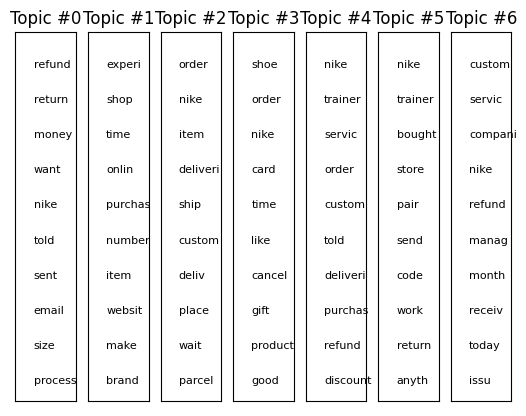

In [85]:
word_topic = np.array(lda_model.components_)
#print(word_topic)
word_topic = word_topic.transpose()

num_top_words = 10
vocab_array = np.asarray(ColumnNames)

#fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus
fontsize_base = 8

for t in range(NUM_TOPICS):
    plt.subplot(1, NUM_TOPICS, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.3, num_top_words-i-0.5, word, fontsize=fontsize_base)
                 ##fontsize_base*share)

#plt.tight_layout()
#plt.show()
plt.savefig("TopicsVis.pdf")

In [91]:
MyDTM_DF

,absolut,actual,agent,anoth,anyth,arriv,avoid,bought,brand,cancel,...,trainer,updat,wait,want,websit,week,work,worst,wrong,year
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,2,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0,0,0,0,3,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
316,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
317,0,1,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
318,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [3]:
pip install matplotlib

  Using cached matplotlib-3.7.1-cp39-cp39-win_amd64.whl (7.6 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Users\\poona\\AppData\\Local\\Programs\\Python\\Python39\\Lib\\site-packages\\matplotlib\\ft2font.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
